In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/statlog_heart/heart_data.csv')

In [2]:
df = df.rename(columns={'heart_disease': 'target'})
X = df.drop('target', axis=1)
y = df['target']
print(X.shape, y.shape)

(270, 13) (270,)


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-np.pi, np.pi))
X = scaler.fit_transform(X)
y = np.array(y).reshape(-1, 1)

(270, 13) (270, 1)


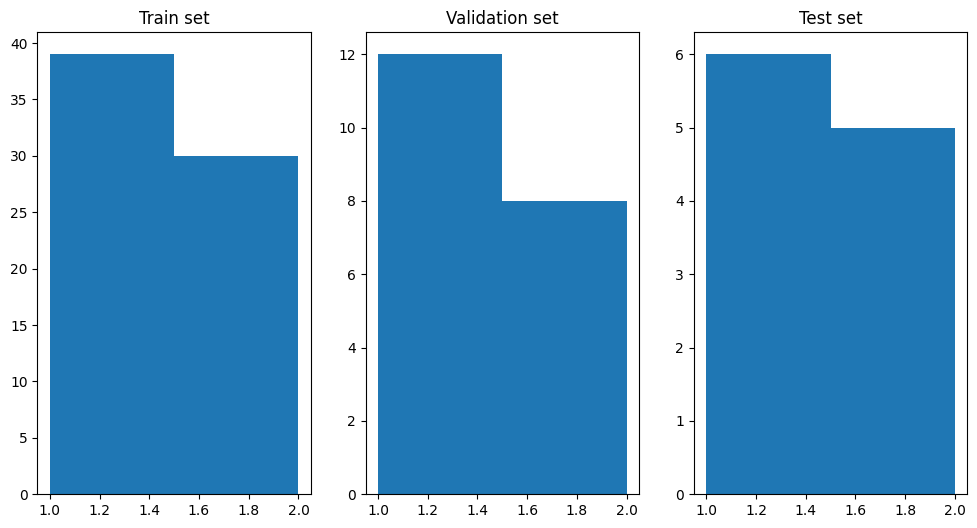

[-] Data split into 69 training samples, 20 validation samples, and 11 test samples


In [4]:
from src.experiment import Experiment

experiment1_zz = Experiment(X.shape[1], sample_size = 100)
experiment1_zz.split_data(X, y, use_sample=True,verbose=True)


In [5]:
print(experiment1_zz._X.shape)

(270, 13)


In [6]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit_machine_learning.algorithms import VQC
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap
from qiskit_algorithms.optimizers import COBYLA

In [7]:
zz_feature_map = ZZFeatureMap(
    feature_dimension=experiment1_zz.X_train.shape[1], 
    reps=2)
pauli_feature_map = PauliFeatureMap(
    feature_dimension=experiment1_zz.X_train.shape[1], 
    reps=2, paulis=["Z", "YY"], 
    entanglement="full"
)


In [8]:
from src.ansatz import *

In [9]:
# print(zz_feature_map._base_name)
# print(pauli_feature_map._base_name)

[+] Running experiment with ZZ Feature Map...
     [>] Skipping training for ZZFeatureMap, ansatz_1 with 1 repetitions
     [>] Skipping training for ZZFeatureMap, ansatz_1 with 2 repetitions
     [>] Skipping training for ZZFeatureMap, ansatz_1 with 3 repetitions
     [>] Skipping training for ZZFeatureMap, ansatz_2 with 1 repetitions
     [>] Skipping training for ZZFeatureMap, ansatz_2 with 2 repetitions
     [>] Skipping training for ZZFeatureMap, ansatz_2 with 3 repetitions
     [>] Skipping training for ZZFeatureMap, ansatz_3 with 1 repetitions
     [>] Skipping training for ZZFeatureMap, ansatz_3 with 2 repetitions
     [>] Skipping training for ZZFeatureMap, ansatz_3 with 3 repetitions
     [>] Skipping training for ZZFeatureMap, ansatz_4 with 1 repetitions
     [>] Skipping training for ZZFeatureMap, ansatz_4 with 2 repetitions
     [>] Skipping training for ZZFeatureMap, ansatz_4 with 3 repetitions


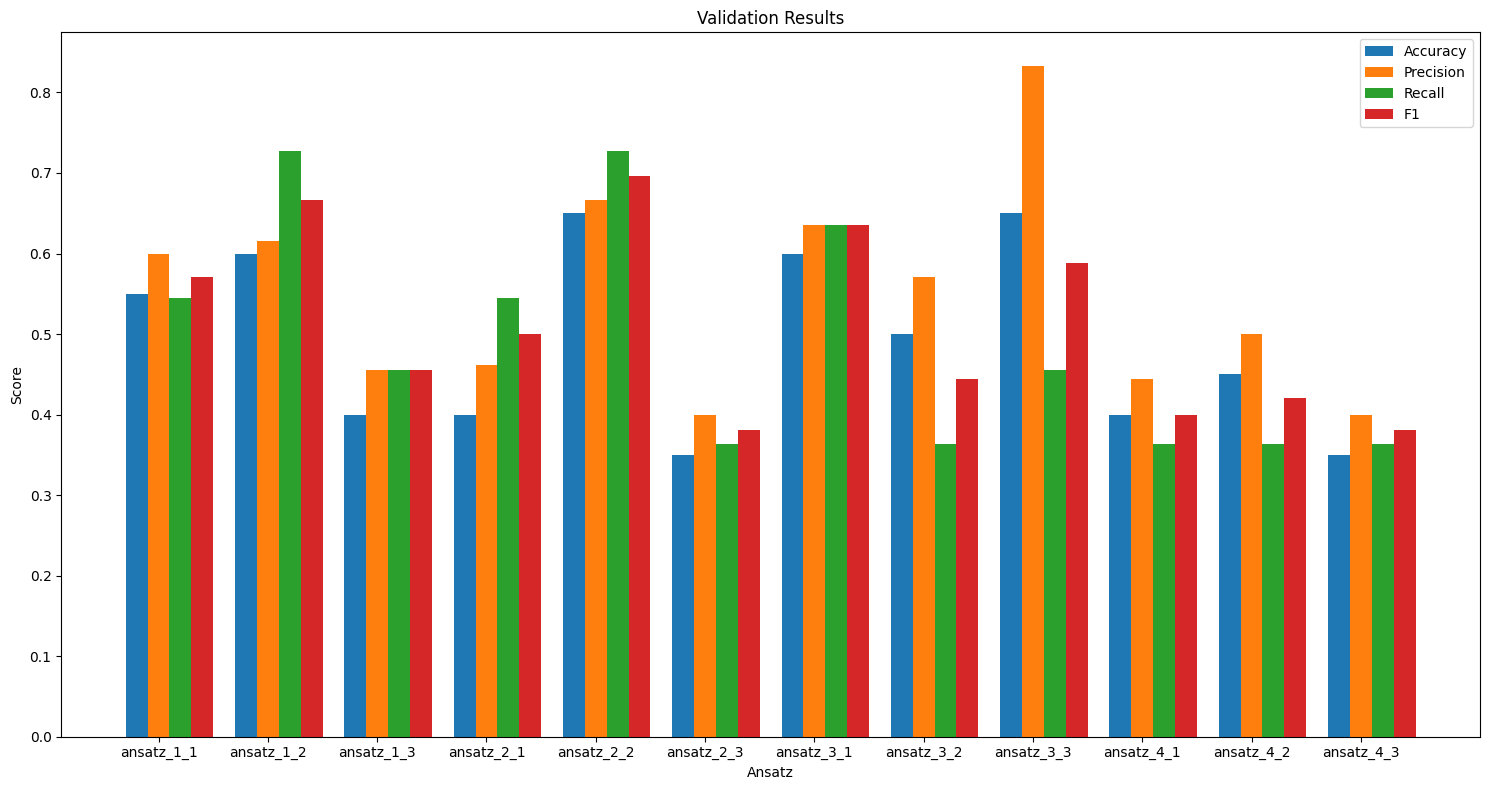

In [10]:
print("[+] Running experiment with ZZ Feature Map...")
experiment1_zz.run_experiment(zz_feature_map, [ansatz_1, ansatz_2, ansatz_3, ansatz_4], max_reps=3)
experiment1_zz.plot_results()



(270, 13) (270, 1)


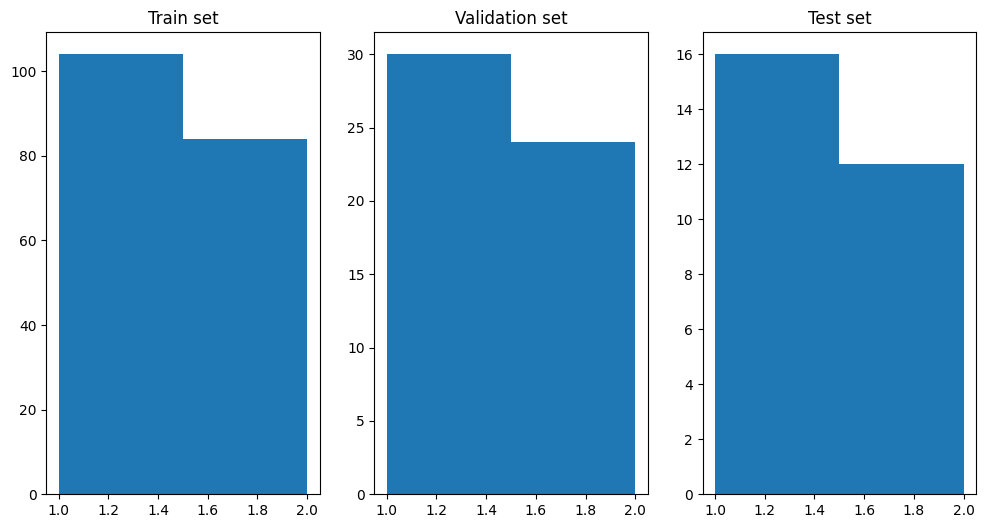

[-] Data split into 188 training samples, 54 validation samples, and 28 test samples
[-] Evaluating best model on test set: {'ansatz': 'ansatz_2', 'feature_map': 'ZZFeatureMap', 'reps': 2, 'accuracy': 0.65, 'precision': 0.667, 'recall': 0.727, 'f1': 0.696, 'time': 1908.558}


In [11]:
test_results = experiment1_zz.evaluate_best_on_test(use_full_data=True)
print("Test Results for the Best Model on ZZ Feature Set:", test_results)